In [13]:
from model import ebola_model

from ema_workbench import Model, IntegerParameter, RealParameter, TimeSeriesOutcome, ScalarOutcome, ArrayOutcome, Policy

model = Model('Ebola', function=ebola_model)

model.uncertainties = [IntegerParameter('I4', 1, 8),
                       IntegerParameter('I14', 20, 35),
                       IntegerParameter('I15', 25, 40),
                       RealParameter('beta_i', 0.1, 0.5),
                       RealParameter('travel_rate', 0.04, 0.1)]

model.outcomes = [ScalarOutcome('Effectiveness'),
                  ScalarOutcome('Speed'),
                  ScalarOutcome('Equity in met demand'),
                  ScalarOutcome('Equity in arrival times'),
                  ScalarOutcome('Cost per death prevented'),
                  TimeSeriesOutcome('Uncertainty over Time'),
                  TimeSeriesOutcome('Decision Types over Time'),
                  ArrayOutcome('Chosen Regions')]

model.levers = [RealParameter('exploration_ratio', 0.0, 1.0)]
                
policies = [Policy("All exploitation", **{'exploration_ratio' : 0.0})]

from ema_workbench import SequentialEvaluator

from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)
'''
with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=10, policies = policies)
'''

from ema_workbench import MultiprocessingEvaluator



import time
start_time = time.time()


with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=10, policies = policies)
    
print("--- %s seconds ---" % (time.time() - start_time))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 7 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 9 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


--- 28.51213788986206 seconds ---


[MainProcess/INFO] Effectiveness not shown because it is not time series data
[MainProcess/INFO] Speed not shown because it is not time series data
[MainProcess/INFO] Equity in met demand not shown because it is not time series data
[MainProcess/INFO] Equity in arrival times not shown because it is not time series data
[MainProcess/INFO] Cost per death prevented not shown because it is not time series data


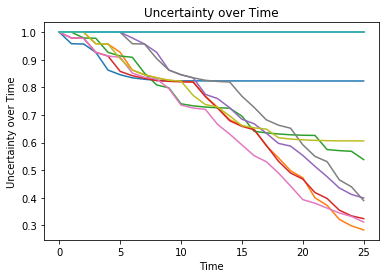

In [14]:
experiments, outcomes = results



import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines

figure = lines(experiments, outcomes, outcomes_to_show=['Uncertainty over Time']) 
plt.show() 


In [15]:
print(outcomes['Chosen Regions'])

[[15 14 15 None 14 None None None None None None None None None None None
  None None None None None None None None None None]
 [None None 15 14 15 14 15 14 15 10 11 13 11 13 9 7 6 12 5 8 4 5 4 0 4 1]
 [None 15 None 15 14 11 14 10 None None None None 13 9 None None None
  None None 5 None None 4 None None 0]
 [15 None 14 15 14 15 14 14 14 10 11 13 11 13 12 9 7 4 0 4 1 4 0 4 4 8]
 [None None None None None 15 14 15 14 10 14 13 11 None 12 7 None 8 3 9 4
  6 None 5 2 0]
 [None None None None None None None None None None None None None None
  None None None None None None None None None None None None]
 [15 None 15 14 15 14 11 10 11 None 9 13 6 8 12 5 4 7 4 0 4 1 2 3 None
  None]
 [None None None None None 14 15 14 15 14 15 14 13 10 11 10 11 9 6 12 5 8
  2 4 4 4]
 [None None 14 15 14 15 14 15 13 11 None 10 7 None None 12 None None None
  None None None None None None None]
 [None None None None None None None None None None None None None None
  None None None None None None None None Non

In [2]:
from model_with_policy import borg_ebola

from ema_workbench import Model, IntegerParameter, RealParameter, TimeSeriesOutcome, ScalarOutcome, ArrayOutcome, Policy

model = Model('Ebola', function=borg_ebola)


model.outcomes = [ScalarOutcome('Effectiveness'),
                  ScalarOutcome('Speed'),
                  ScalarOutcome('Equity in met demand'),
                  ScalarOutcome('Equity in arrival times'),
                  ScalarOutcome('Cost per death prevented'),
                  TimeSeriesOutcome('Uncertainty over Time'),
                  TimeSeriesOutcome('Decision Types over Time'),
                  ArrayOutcome('Chosen Regions')]


model.uncertainties = [IntegerParameter('I4', 1, 8),
                       IntegerParameter('I14', 20, 35),
                       IntegerParameter('I15', 25, 40),
                       RealParameter('beta_i', 0.1, 0.5),
                       RealParameter('travel_rate', 0.04, 0.1)]


model.levers = [RealParameter('c1', -1.0, 1.0),
               RealParameter('c2', -1.0, 1.0),
               RealParameter('r1', 0.000001, 1.0),
               RealParameter('r2', 0.000001, 1.0),
               RealParameter('w', 0, 1.0)]
                

policies = [Policy("141", **{'c1' : 0.189347,
                                          'c2' : 0.297782,
                                          'r1' : 0.663825,
                                          'r2' : 0.677523,
                                          'w' : 0.470387}),
           Policy("185", **{'c1' : 0.310568,
                                          'c2' : 0.006200,
                                          'r1' : 0.539050,
                                          'r2' : 0.604281,
                                          'w' : 0.624870})]

In [3]:
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)
'''
with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=10, policies = policies)
'''

from ema_workbench import MultiprocessingEvaluator



import time
start_time = time.time()


with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=10, policies = policies)
    
print("--- %s seconds ---" % (time.time() - start_time))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10 scenarios * 2 policies * 1 model(s) = 20 experiments
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 12 cases completed
[MainProcess/INFO] 14 cases completed
[MainProcess/INFO] 16 cases completed
[MainProcess/INFO] 18 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


--- 54.954655170440674 seconds ---


[MainProcess/INFO] Effectiveness not shown because it is not time series data
[MainProcess/INFO] Speed not shown because it is not time series data
[MainProcess/INFO] Equity in met demand not shown because it is not time series data
[MainProcess/INFO] Equity in arrival times not shown because it is not time series data
[MainProcess/INFO] Cost per death prevented not shown because it is not time series data


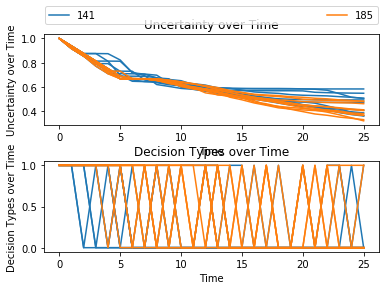

In [5]:
experiments, outcomes = results



import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines

figure = lines(experiments, outcomes, outcomes_to_show=['Uncertainty over Time', 'Decision Types over Time'], group_by='policy') 
plt.show() 

In [6]:
print(outcomes['Chosen Regions'])


[[list([5, 10, 9]) list([0, 1, 8]) list([4, 15, 11]) list([13, 6, 2])
  list([3, 7, 12]) 14 14 14 15 11 10 15 3 1 15 15 11 15 13 9 4 8 0 7 5 12]
 [list([8, 10, 4]) list([0, 2, 5]) 4 list([1, 11, 7]) list([9, 13, 12])
  list([6, 3]) 14 15 10 15 11 13 5 None None 9 None None None None None
  None None None None None]
 [list([3, 10, 8]) list([11, 7, 14]) list([0, 13, 1]) list([6, 5, 12])
  list([2, 4, 15]) 14 15 14 list([9]) 6 None None None None None None
  None None None None None None None None None 0]
 [list([4, 6, 14]) list([8, 12, 13]) list([11, 3, 0]) 15 list([2, 5, 7])
  list([10, 9, 1]) 15 14 15 15 15 14 14 14 14 14 10 11 11 11 4 13 9 3 9
  10]
 [list([0, 10, 5]) list([9, 15, 13]) 15 13 15 list([6, 1, 7]) 14 14 14
  list([2, 8, 3]) 15 4 2 4 11 10 4 11 10 8 10 0 0 5 0 9]
 [list([4, 15, 9]) list([2, 0, 12]) list([5, 8, 7]) 15 4 list([11, 6, 1])
  14 list([13, 10, 3]) 15 14 11 13 10 3 9 6 1 None None 12 None None 5
  None None None]
 [list([9, 12, 14]) list([11, 6, 10]) list([8, 5, 